#  Assignment 1 Part 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('nbagg')
import matplotlib.pyplot as plt
plt.ioff()

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
#load file
data = pd.read_csv("./House_prediction.csv", header=0, na_values='-')

In [3]:
columns = list(data.columns)
# checking imported data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  int64  
 2   rooms                10692 non-null  int64  
 3   bathroom             10692 non-null  int64  
 4   parking spaces       10692 non-null  int64  
 5   floor                8231 non-null   float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  object 
 8   hoa (R$)             10692 non-null  int64  
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>


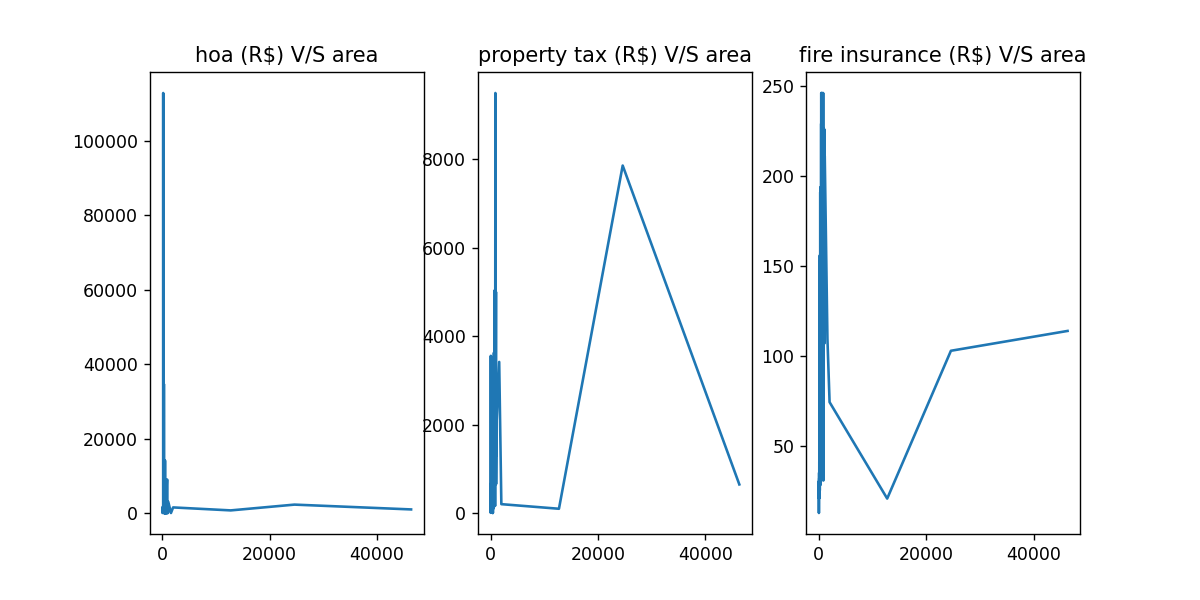

<IPython.core.display.Javascript object>


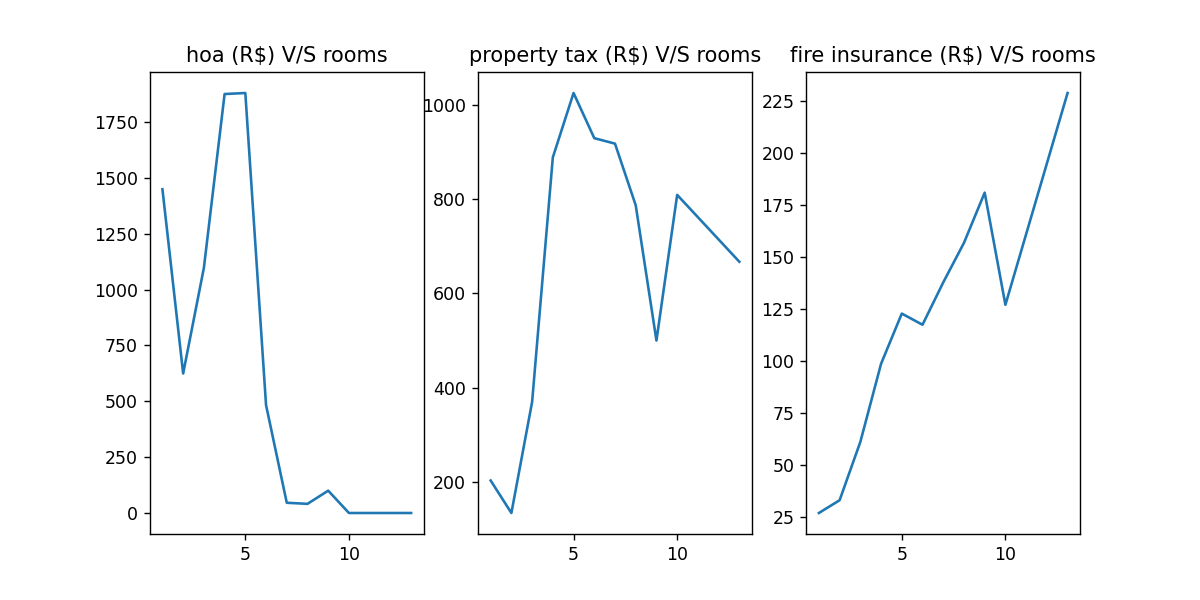

<IPython.core.display.Javascript object>


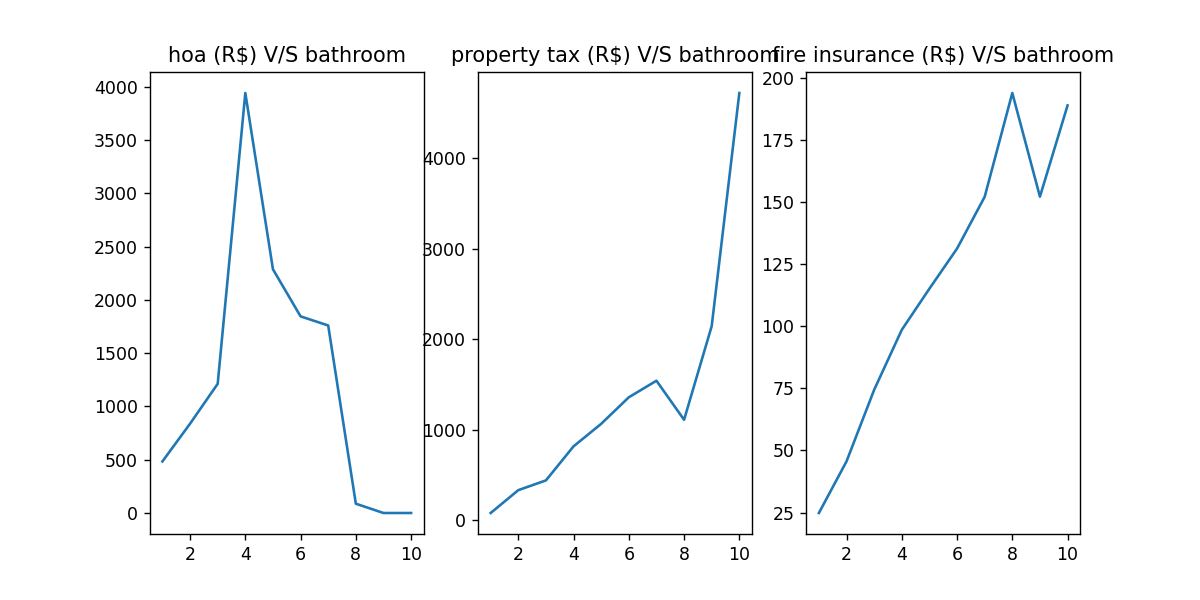

<IPython.core.display.Javascript object>


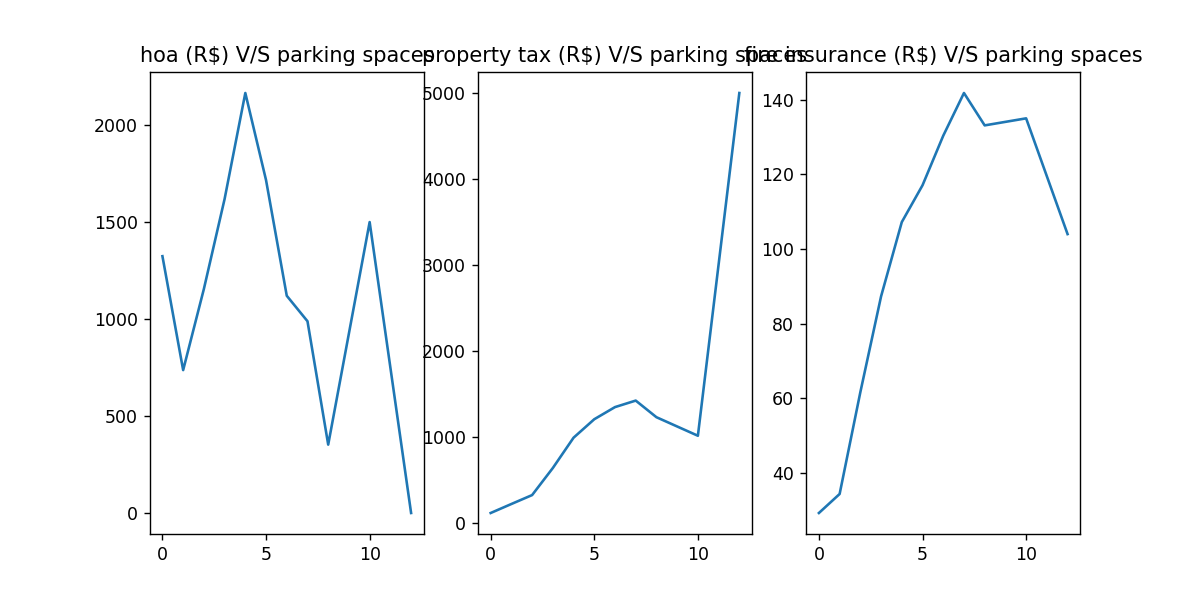

<IPython.core.display.Javascript object>


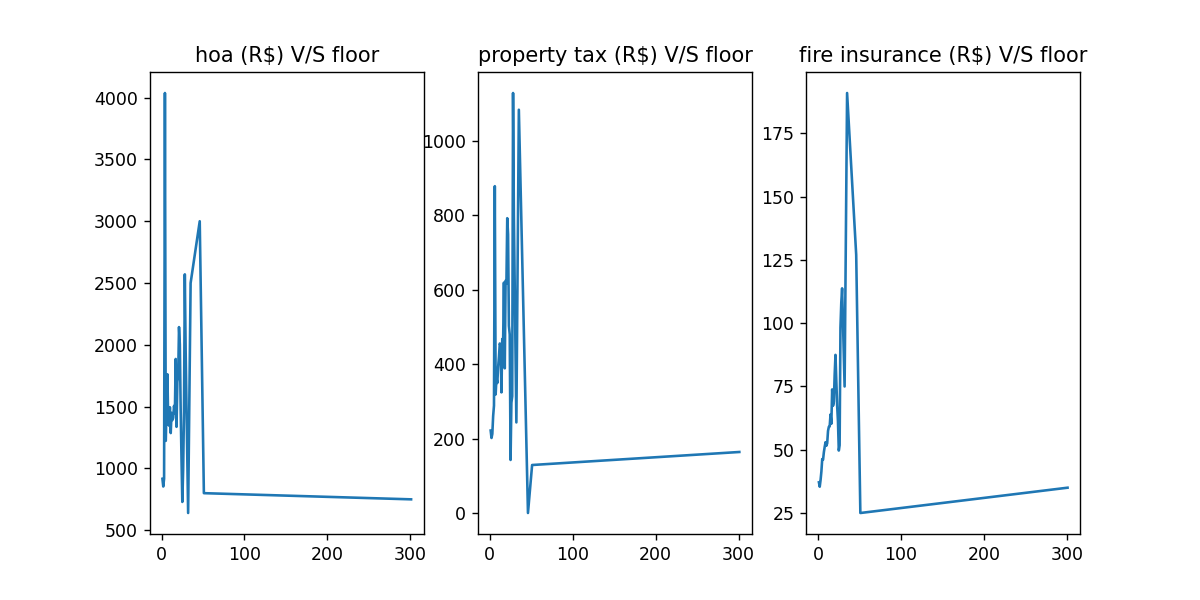

<IPython.core.display.Javascript object>


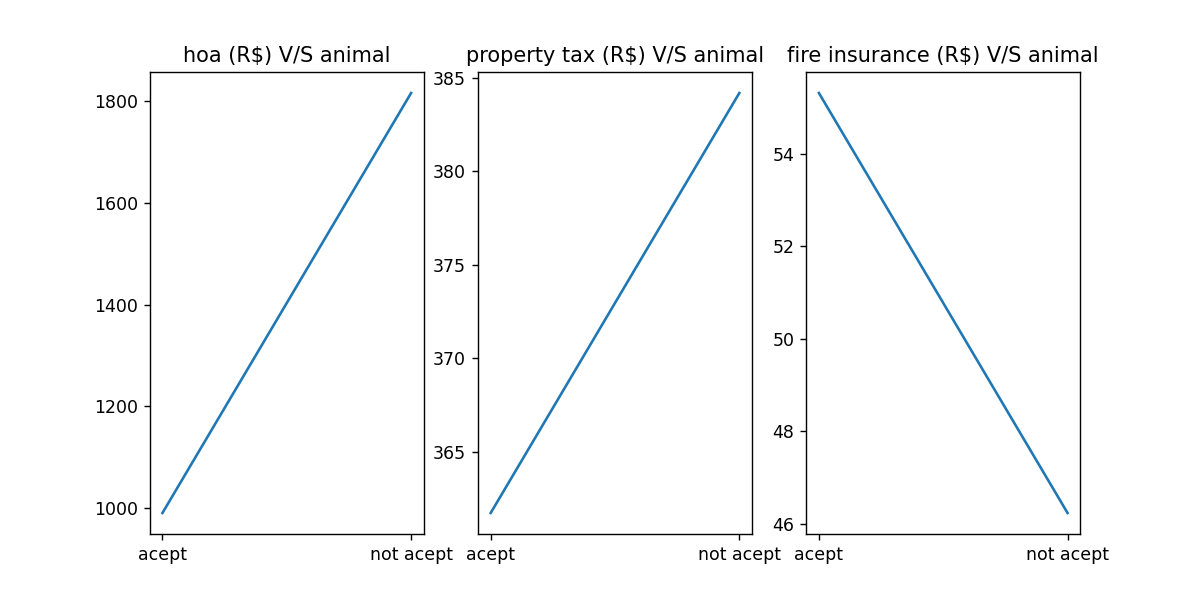

<IPython.core.display.Javascript object>


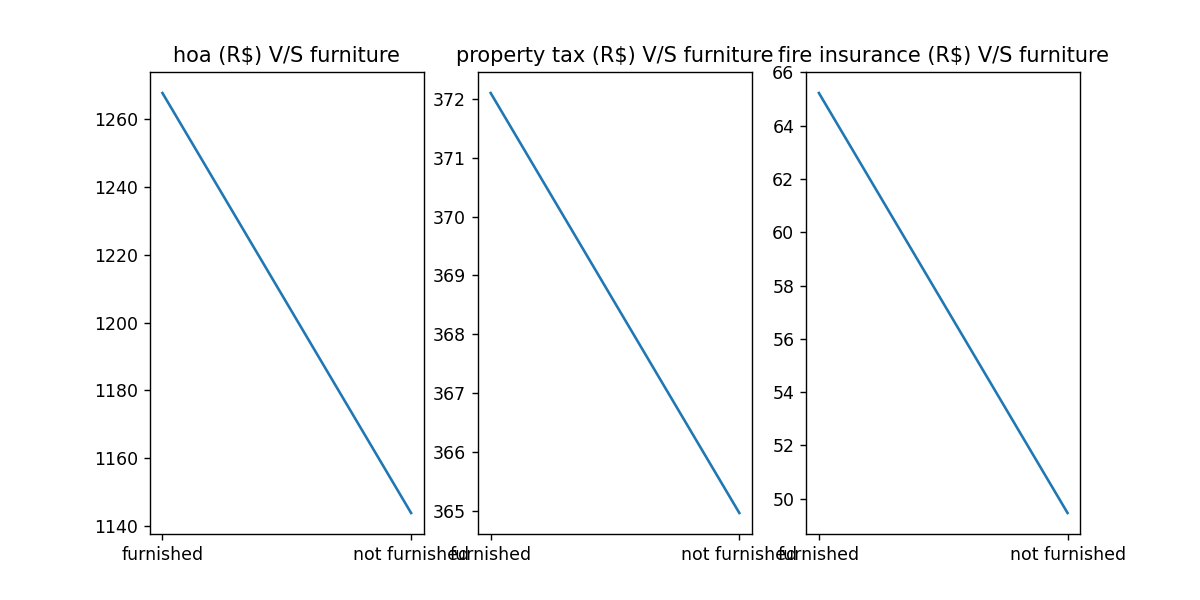

In [4]:
# plotting data to see patterns and need for removal of outliers
for col in columns[1:8]:
    means_of_groups = data.groupby([col]).describe()[[(columns[8], 'mean'), (columns[10], 'mean'), (columns[11], 'mean')]]
    
    fig, ax = plt.subplots(1, 3, figsize=[9.6, 4.8])
    for i, j in zip([8, 10, 11], range(3)):
        ax[j].plot(np.array(means_of_groups.index), means_of_groups[(columns[i], 'mean')])
        ax[j].set(title=f"{columns[i]} V/S {col}")
    fig.show()

We see that outliers in data corresponding to area needs to be removed for proper analysis.

We create scatter plots to determine the extreme values and discard them.

<IPython.core.display.Javascript object>


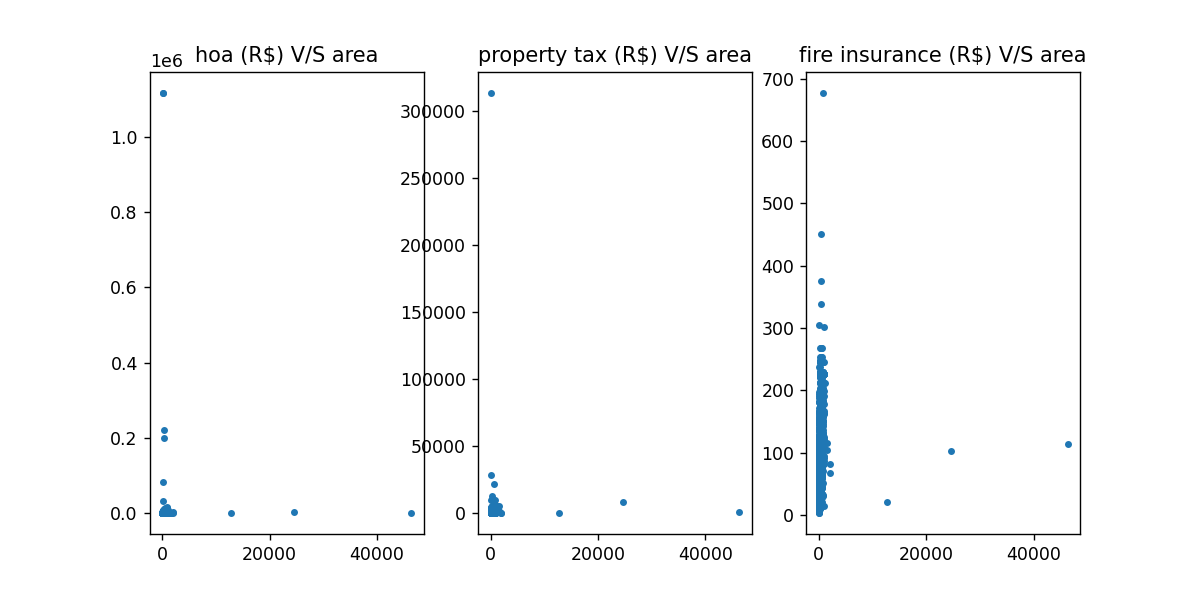

In [5]:
#hoa_vs_area_bool_array = np.logical_and((np.array(data[columns[1]]) <= 1500), np.array(data[columns[8]]) <= 12e3)
fig, axes = plt.subplots(1, 3, figsize=[9.6, 4.8])
for y_label_idx, i in zip([8, 10, 11], range(3)):
    axes[i].scatter(np.array(data[columns[1]]), np.array(data[columns[y_label_idx]]), marker='.')
    axes[i].set(title=f"{columns[y_label_idx]} V/S {columns[1]}")
fig.show()

<IPython.core.display.Javascript object>


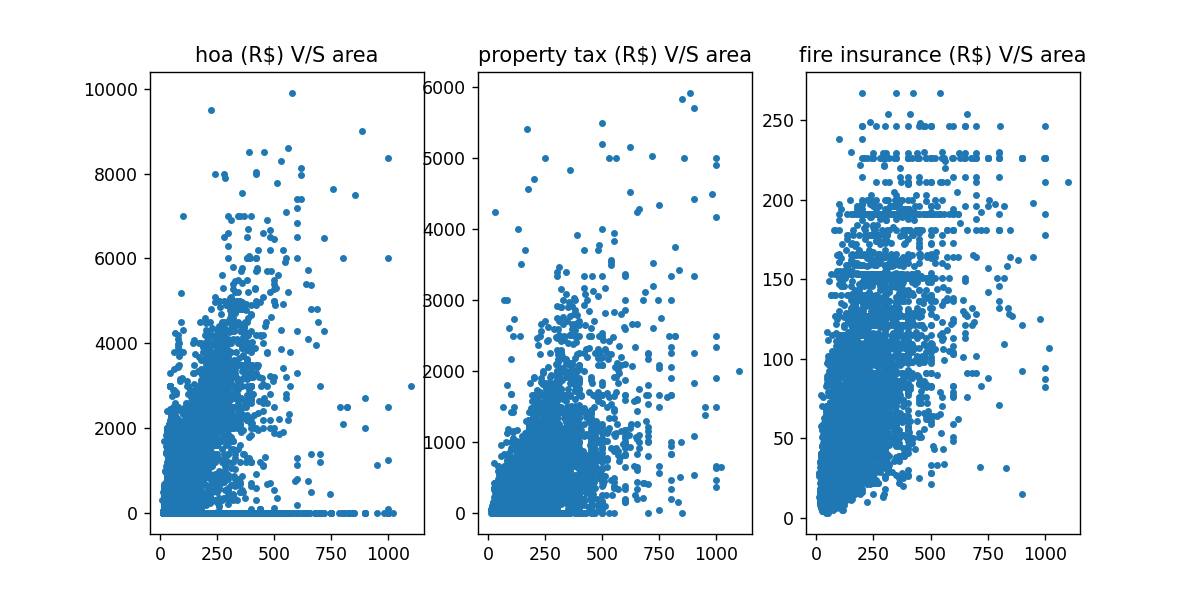

In [6]:
# Creating scatter plot for area after removing outliers

# area_bool_array is a boolean array indicating values to include and discard
area_bool_array = np.logical_and.reduce((np.array(data[columns[1]]) < 1500, np.array(data[columns[8]]) < 1e4, np.array(data[columns[10]]) < 8e3, np.array(data[columns[11]]) < 300))
area_array = np.array(data[columns[1]])[area_bool_array]

fig, axes = plt.subplots(1, 3, figsize=[9.6, 4.8])
for y_label_idx, i in zip([8, 10, 11], range(3)):
    axes[i].scatter(area_array, np.array(data[columns[y_label_idx]])[area_bool_array], marker='.')
    axes[i].set(title=f"{columns[y_label_idx]} V/S {columns[1]}")
fig.show()

In [7]:
# Create a data frame for data corresponding to area after removing outliers
area_df = pd.DataFrame()

for col_idx in [1, 8, 10, 11]:
    area_df[columns[col_idx]] = np.array(data[columns[col_idx]])[area_bool_array]
area_df.set_index(columns[1], inplace=True)

# Function for grouping of data by area
def groupFunc(num):
    return (num // 50) * 50

mean_grouped_area_df = area_df.groupby(groupFunc).mean()

mean_grouped_area_df

,hoa (R$),property tax (R$),fire insurance (R$)
area,,,
0,422.284748,55.459136,23.041645
50,604.053266,103.348233,28.989026
100,962.565979,256.861789,50.299562
150,1273.971307,410.493092,70.156217
200,1687.819022,641.904888,87.434610
250,1604.039761,701.298211,95.654076
300,1561.882206,867.511278,107.536341
350,1788.266667,1028.580392,116.176471
400,1422.819767,947.151163,132.052326


<IPython.core.display.Javascript object>


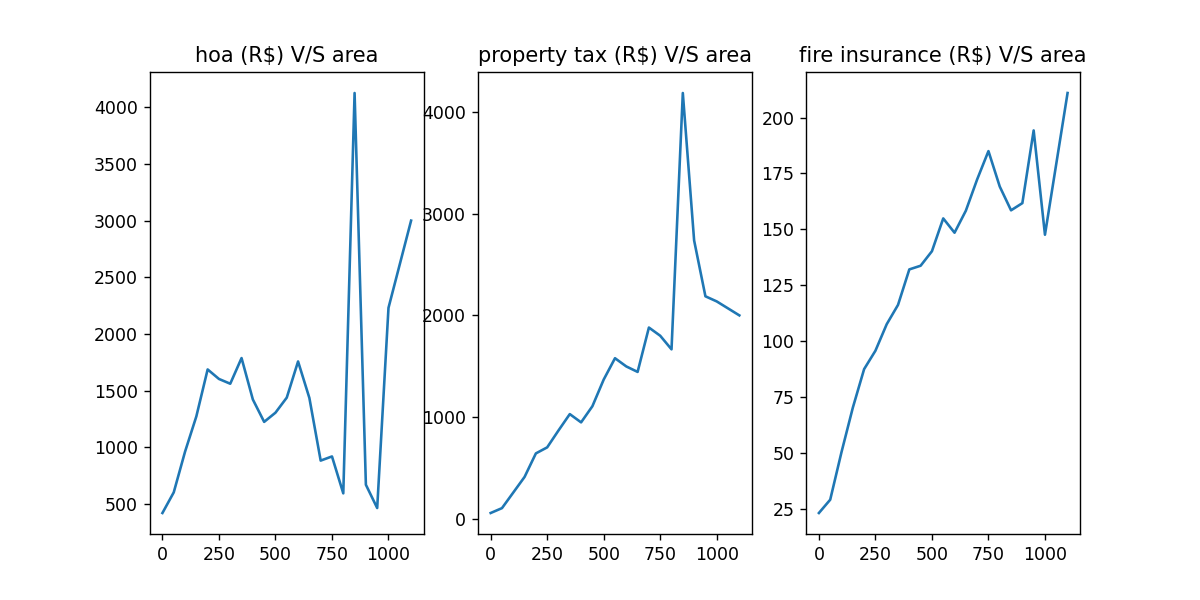

In [8]:
# ploting means of grouped data
fig, axes = plt.subplots(1, 3, figsize=[9.6, 4.8])
for y_label_idx, i in zip([8, 10, 11], range(3)):
    axes[i].plot(np.array(mean_grouped_area_df.index), np.array(mean_grouped_area_df[columns[y_label_idx]]))
    axes[i].set(title=f"{columns[y_label_idx]} V/S {columns[1]}")
fig.show()

## Conclusion

We see increasing or decreasing patterns in Fire Insurance V/S Rooms, Property Tax V/S Bathrooms, Fire Insurance V/S Bathrooms, Property Tax V/S Area and, Fire Insurance V/S Area plots. Moreover, HOA, Property Tax, and Fire Insurance show a dependence on furnishing of the houses.

* **Fire Insurance V/S Rooms**: Increasing
* **Property Tax V/S Bathrooms**: Increasing
* **Fire Insurance V/S Bathrooms**: Increasing
* **Property Tax V/S Area**: Increasing
* **Fire Insurance V/S Area**: Increasing
* We see that furnished houses always have greater HOA, property tax and fire insurance than unfurnished houses.